In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import kagglehub

from kagglehub import KaggleDatasetAdapter

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn import tree


In [6]:
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "sandhyapeesara/cloud-anomaly-data",
  "Cloud_Anomaly_Dataset.csv"
)

In [16]:
df1 = df.dropna(subset=['cpu_usage', 'memory_usage', 'network_traffic', 'power_consumption',
                   'num_executed_instructions', 'execution_time', 'energy_efficiency'])
df1 = df1.drop(columns=['vm_id', 'timestamp', 'task_type', 'task_priority', 'task_status'])

In [17]:
df1.isna().sum()

cpu_usage                    0
memory_usage                 0
network_traffic              0
power_consumption            0
num_executed_instructions    0
execution_time               0
energy_efficiency            0
Anomaly status               0
dtype: int64

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132989 entries, 0 to 277569
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   cpu_usage                  132989 non-null  float64
 1   memory_usage               132989 non-null  float64
 2   network_traffic            132989 non-null  float64
 3   power_consumption          132989 non-null  float64
 4   num_executed_instructions  132989 non-null  float64
 5   execution_time             132989 non-null  float64
 6   energy_efficiency          132989 non-null  float64
 7   Anomaly status             132989 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 9.1 MB


In [19]:
df1.describe()

,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,Anomaly status
count,132989.000000,132989.000000,132989.000000,132989.000000,132989.000000,132989.000000,132989.000000,132989.000000
mean,49.989194,50.011030,500.679237,249.818975,4996.848190,50.094155,0.500566,0.059020
std,28.870972,28.860843,288.389995,144.681034,2880.713288,28.871232,0.288615,0.235663
min,0.000133,0.001100,0.007070,0.000802,0.000000,0.000172,0.000004,0.000000
25%,24.829999,25.095594,251.004540,123.578397,2504.000000,25.132790,0.250378,0.000000
50%,49.994907,49.909828,500.565401,250.503650,4989.000000,50.165326,0.501723,0.000000
75%,75.059010,75.027500,750.142247,375.428764,7489.000000,75.237503,0.750524,0.000000
max,99.999171,99.999907,999.998686,499.998819,9999.000000,99.998381,0.999992,1.000000


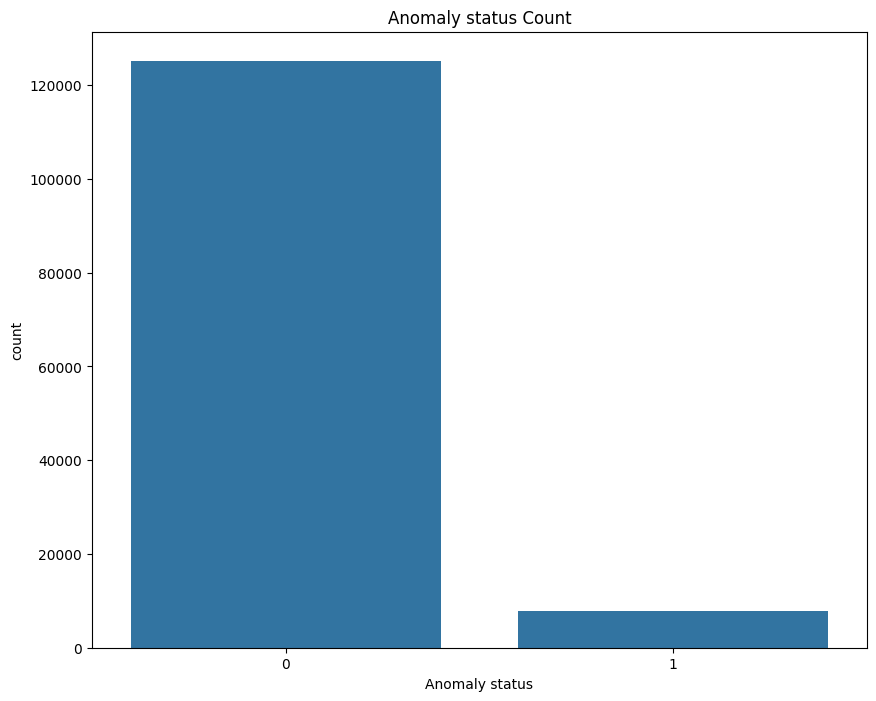

In [20]:
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x='Anomaly status',data=df1)
plt.title("Anomaly status Count")
plt.show()

In [21]:
df1['Anomaly status'].value_counts()

Anomaly status
0    125140
1      7849
Name: count, dtype: int64

In [32]:
y_target = df1['Anomaly status']
x_data = df1.drop(['Anomaly status'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.20)

clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=20)
clf = clf.fit(x_train,y_train)

#Evaluación en el conjunto de prueba
y_pred = clf.predict(x_test)

print('Accuracy de DecisionTreeClassifier sobre el conjunto de prueba es: {:.2f}'.format(clf.score(x_test, y_test))) 
cmatrix = confusion_matrix(y_test, y_pred)
print(cmatrix)

print(classification_report(y_test, y_pred))
print(x_data.columns)

Accuracy de DecisionTreeClassifier sobre el conjunto de prueba es: 0.94
[[24845   202]
 [ 1512    39]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     25047
           1       0.16      0.03      0.04      1551

    accuracy                           0.94     26598
   macro avg       0.55      0.51      0.51     26598
weighted avg       0.90      0.94      0.91     26598

Index(['cpu_usage', 'memory_usage', 'network_traffic', 'power_consumption',
       'num_executed_instructions', 'execution_time', 'energy_efficiency'],
      dtype='object')
